# Implementing Q learning with the Taxi gym environment

In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import gym
import random

## Create the environment

In [36]:
env = gym.make("Taxi-v2")
env.reset()
env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



Description:
There are four designated locations in the grid world indicated by R(ed), B(lue), G(reen), and Y(ellow). When the episode starts, the taxi starts off at a random square and the passenger is at a random location. The taxi drive to the passenger's location, pick up the passenger, drive to the passenger's destination (another one of the four specified locations), and then drop off the passenger. Once the passenger is dropped off, the episode ends.

Observations: 
There are 500 discrete states since there are 25 taxi positions, 5 possible locations of the passenger (including the case when the passenger is the taxi), and 4 destination locations. 
    
Actions: 
There are 6 discrete deterministic actions:
    - 0: move south
    - 1: move north
    - 2: move east 
    - 3: move west 
    - 4: pickup passenger
    - 5: dropoff passenger
    
Rewards: 
There is a reward of -1 for each action and an additional reward of +20 for delievering the passenger. There is a reward of -10 for executing actions "pickup" and "dropoff" illegally.
    
Rendering:
    - blue: passenger
    - magenta: destination
    - yellow: empty taxi
    - green: full taxi
    - other letters (R, G, B and Y): locations for passengers and destinations
    
actions:
    - 0: south
    - 1: north
    - 2: east
    - 3: west
    - 4: pickup
    - 5: dropoff

The state space is represented by: (taxi_row, taxi_col, passenger_location, destination)

In [37]:
action_size = env.action_space.n
state_size = env.observation_space.n
print("Action space size: ", action_size)
print("State space size: ", state_size)

Action space size:  6
State space size:  500


The taxi environment has a finite number of actions and states, which makes it suitable for Q learning algorithm.

## Initialise the Q table

In [38]:
Q = np.zeros((state_size, action_size))

## Define the hyperparameters

In [39]:
train_episodes = 2000         # Total train episodes
test_episodes = 100           # Total test episodes
max_steps = 100               # Max steps per episode
alpha = 0.7                   # Learning rate
gamma = 0.618                 # Discounting rate

epsilon = 1                   # Exploration rate
max_epsilon = 1               # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.01             # Exponential decay rate for exploration prob

## Training phase

In [40]:
training_rewards = []   # list of rewards

for episode in range(train_episodes):
    state = env.reset()    # Reset the environment
    cumulative_training_rewards = 0
    
    for step in range(max_steps):
        # Choose an action (a) among the possible states (s)
        exp_exp_tradeoff = random.uniform(0, 1)   # choose a random number
        
        # If this number > epsilon, select the action corresponding to the biggest Q value for this state (Exploitation)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(Q[state,:])        
        # Else choose a random action (Exploration)
        else:
            action = env.action_space.sample()
        
        # Perform the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)

        # Update the Q table using the Bellman equation: Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[new_state, :]) - Q[state, action]) 
        cumulative_training_rewards += reward  # increment the cumulative reward        
        state = new_state         # Update the state
        
        # If we reach the end of the episode
        if done == True:
            print ("Cumulative reward for episode {}: {}".format(episode, cumulative_training_rewards))
            break
    
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    
    # append the episode cumulative reward to the list
    training_rewards.append(cumulative_training_rewards)

print ("Training score over time: " + str(sum(training_rewards)/train_episodes))

Cumulative reward for episode 24: -248
Cumulative reward for episode 42: -187
Cumulative reward for episode 67: -259
Cumulative reward for episode 70: -256
Cumulative reward for episode 77: -159
Cumulative reward for episode 83: -22
Cumulative reward for episode 84: -42
Cumulative reward for episode 85: -175
Cumulative reward for episode 100: -193
Cumulative reward for episode 106: 2
Cumulative reward for episode 108: -109
Cumulative reward for episode 109: -21
Cumulative reward for episode 112: -9
Cumulative reward for episode 116: -68
Cumulative reward for episode 118: -30
Cumulative reward for episode 119: -69
Cumulative reward for episode 120: -43
Cumulative reward for episode 127: -129
Cumulative reward for episode 129: -87
Cumulative reward for episode 132: -64
Cumulative reward for episode 134: 3
Cumulative reward for episode 138: -49
Cumulative reward for episode 141: -130
Cumulative reward for episode 142: -15
Cumulative reward for episode 144: -112
Cumulative reward for episo

Cumulative reward for episode 480: 11
Cumulative reward for episode 481: -14
Cumulative reward for episode 482: 6
Cumulative reward for episode 483: 7
Cumulative reward for episode 484: 9
Cumulative reward for episode 485: 6
Cumulative reward for episode 486: 8
Cumulative reward for episode 487: 12
Cumulative reward for episode 488: 3
Cumulative reward for episode 489: 7
Cumulative reward for episode 490: -1
Cumulative reward for episode 491: 4
Cumulative reward for episode 492: 6
Cumulative reward for episode 493: 9
Cumulative reward for episode 494: 11
Cumulative reward for episode 495: 3
Cumulative reward for episode 496: 8
Cumulative reward for episode 497: 7
Cumulative reward for episode 498: 8
Cumulative reward for episode 499: 8
Cumulative reward for episode 500: 10
Cumulative reward for episode 501: 4
Cumulative reward for episode 502: 2
Cumulative reward for episode 503: 4
Cumulative reward for episode 504: -3
Cumulative reward for episode 505: 8
Cumulative reward for episode 

Cumulative reward for episode 1035: 9
Cumulative reward for episode 1036: 8
Cumulative reward for episode 1037: 9
Cumulative reward for episode 1038: 8
Cumulative reward for episode 1039: 10
Cumulative reward for episode 1040: 12
Cumulative reward for episode 1041: 6
Cumulative reward for episode 1042: 4
Cumulative reward for episode 1043: 14
Cumulative reward for episode 1044: 7
Cumulative reward for episode 1045: 11
Cumulative reward for episode 1046: 6
Cumulative reward for episode 1047: 5
Cumulative reward for episode 1048: 8
Cumulative reward for episode 1049: 12
Cumulative reward for episode 1050: 8
Cumulative reward for episode 1051: 7
Cumulative reward for episode 1052: 10
Cumulative reward for episode 1053: 12
Cumulative reward for episode 1054: 8
Cumulative reward for episode 1055: 9
Cumulative reward for episode 1056: 4
Cumulative reward for episode 1057: 8
Cumulative reward for episode 1058: 9
Cumulative reward for episode 1059: 12
Cumulative reward for episode 1060: 7
Cumu

Cumulative reward for episode 1629: 9
Cumulative reward for episode 1630: 9
Cumulative reward for episode 1631: 8
Cumulative reward for episode 1632: -1
Cumulative reward for episode 1633: 9
Cumulative reward for episode 1634: 9
Cumulative reward for episode 1635: 7
Cumulative reward for episode 1636: 6
Cumulative reward for episode 1637: 5
Cumulative reward for episode 1638: 5
Cumulative reward for episode 1639: 11
Cumulative reward for episode 1640: 6
Cumulative reward for episode 1641: 5
Cumulative reward for episode 1642: 7
Cumulative reward for episode 1643: 12
Cumulative reward for episode 1644: 7
Cumulative reward for episode 1645: 15
Cumulative reward for episode 1646: 5
Cumulative reward for episode 1647: 12
Cumulative reward for episode 1648: 8
Cumulative reward for episode 1649: 5
Cumulative reward for episode 1650: 5
Cumulative reward for episode 1651: 0
Cumulative reward for episode 1652: 11
Cumulative reward for episode 1653: 11
Cumulative reward for episode 1654: 8
Cumul

## Plot cumulative reward vs the number of episodes

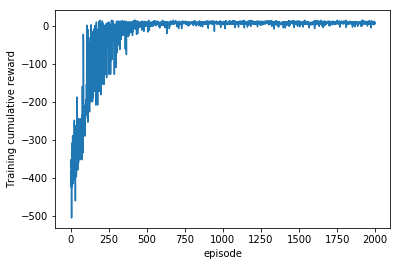

In [41]:
x = range(train_episodes)
plt.plot(x, training_rewards)
plt.xlabel('episode')
plt.ylabel('Training cumulative reward')
plt.show()

## Test phase

In [42]:
test_rewards = []

for episode in range(test_episodes):
    state = env.reset()
    cumulative_test_rewards = 0
    frames = []
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(max_steps):
        env.render()
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(Q[state,:])        
        new_state, reward, done, info = env.step(action)
        cumulative_test_rewards += reward
        state = new_state
        
        if done:
            print ("Cumulative reward for episode {}: {}".format(episode, cumulative_test_rewards))
            break
    test_rewards.append(cumulative_test_rewards)
    
env.close()
print ("Test score over time: " + str(sum(test_rewards)/test_episodes))

****************************************************
EPISODE  0
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
|_| : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
Cumulat